# Predicting Car Prices

In this project we use the machine learning workflow of scikit-learn to predict a car's market price using its attributes.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 30
cars = pd.read_csv('imports-85.data')

In [2]:
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
#add header row for the columns
cars.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

In [4]:
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized_losses    204 non-null object
make                 204 non-null object
fuel_type            204 non-null object
aspiration           204 non-null object
num_doors            204 non-null object
body_style           204 non-null object
drive_wheels         204 non-null object
engine_location      204 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
engine_type          204 non-null object
num_cylinders        204 non-null object
engine_size          204 non-null int64
fuel_system          204 non-null object
bore                 204 non-null object
stroke               204 non-null object
compression_ratio    204 non-null float64
horsepower           204 non-nul

Let's drop all the non-numeric non-continuous columns in this dataframe. The target column is price.

In [6]:
con_val_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
num_cars = cars[con_val_cols]

In [7]:
num_cars.head(3)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
1,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950


## Data Cleaning

Replace missing values with numpy.nan and rescale values to range from 0 to 1.

In [8]:
num_cars = num_cars.replace('?', np.nan)

In [9]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized_losses    164 non-null object
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null int64
bore                 200 non-null object
stroke               200 non-null object
compression_ratio    204 non-null float64
horsepower           202 non-null object
peak_rpm             202 non-null object
city_mpg             204 non-null int64
highway_mpg          204 non-null int64
price                200 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.4+ KB


In [10]:
#convert dataframe columns all to float
num_cars = num_cars.astype('float')

In [11]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb_weight          204 non-null float64
bore                 200 non-null float64
stroke               200 non-null float64
compression_ratio    204 non-null float64
horsepower           202 non-null float64
peak_rpm             202 non-null float64
city_mpg             204 non-null float64
highway_mpg          204 non-null float64
price                200 non-null float64
dtypes: float64(14)
memory usage: 22.4 KB


In [12]:
num_cars.isnull().sum()

normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [13]:
# Drop rows with missing price values
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized_losses    36
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [14]:
# Replace the rest of the missing values with column means
num_cars = num_cars.fillna(num_cars.mean())
num_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [15]:
# Normalize all columnns except the price column.
price_col = num_cars['price']
num_cars = (num_cars - num_cars.min())/(num_cars.max() - num_cars.min())
num_cars['price'] = price_col

In [16]:
num_cars.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


## Univariate Model



In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Split rows in half
    half_rows = int(len(random_df) / 2)
    
    # Create training and test sets
    train_df = random_df.iloc[0:half_rows]
    test_df = random_df.iloc[half_rows:]
    
    # Fit knn using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate rmse
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = num_cars.columns.drop('price')

# For each column return rmse value

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    rmse_results[col] = rmse_val

# Convert to series object
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

curb_weight          3439.491639
highway_mpg          3737.162047
width                3773.135499
city_mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel_base           5443.857347
bore                 6206.924562
peak_rpm             6458.378473
compression_ratio    7193.588599
height               7380.628859
stroke               8184.186086
normalized_losses    8291.523386
dtype: float64

The curb weight column performed the best using the default k value.

In [21]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)

    # Divide number of rows in half
    last_train_row = int(len(random_df) / 2)
    
    # Create training and testing dfs
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column return rmse
train_cols = num_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 5926.514010782393,
  3: 5927.911351770069,
  5: 6206.9245622933095,
  7: 6239.1231894606235,
  9: 6407.868283419558},
 'city_mpg': {1: 4170.034286429789,
  3: 3438.0091973569693,
  5: 3813.193148373158,
  7: 3706.737982542668,
  9: 3811.0390099593706},
 'compression_ratio': {1: 7344.202947903877,
  3: 5943.417906577177,
  5: 7193.5885991346495,
  7: 7540.580427735179,
  9: 7180.410828835924},
 'curb_weight': {1: 4390.877922466076,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'height': {1: 10910.35914761746,
  3: 7805.349593138741,
  5: 7380.628859304605,
  7: 7272.536203121596,
  9: 7121.205659190993},
 'highway_mpg': {1: 3667.7066335790814,
  3: 3602.7490403548477,
  5: 3737.1620469013646,
  7: 3963.0230166902043,
  9: 3972.4730855050143},
 'horsepower': {1: 4183.096630487993,
  3: 4176.022383933198,
  5: 4456.175620282486,
  7: 4658.0497482468845,
  9: 4591.4584980438685},
 'length': {1: 6487.918747179253,
  3: 6134

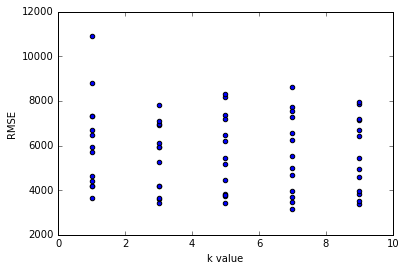

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

In [28]:
# Compute average rmse across different k-values for each feature

feature_avg_rmse = {}

for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

curb_weight          3609.298099
city_mpg             3787.802725
highway_mpg          3788.622765
width                4131.406807
horsepower           4412.960576
wheel_base           5249.730986
length               5537.461758
bore                 6141.668280
compression_ratio    7040.440142
peak_rpm             7112.435583
normalized_losses    7651.230485
stroke               7657.690117
height               8098.015892
dtype: float64

In [30]:
# a knn_train_test function that works with multiple columns

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)

    # Divide number of rows in half
    last_train_row = int(len(random_df) / 2)
    
    # Create training and testing df
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['curb_weight', 'city_mpg']
rmse_val = knn_train_test(two_best_features, 'price', num_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['curb_weight', 'city_mpg', 'highway_mpg']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['curb_weight', 'city_mpg', 'highway_mpg', 'width']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['curb_weight', 'city_mpg', 'highway_mpg', 'width', 'horsepower']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['curb_weight', 'city_mpg', 'highway_mpg', 'width', 'horsepower', 'wheel_base']
rmse_val = knn_train_test(six_best_features, 'price', num_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 2692.4443467600217},
 'four best features': {5: 3048.2253868767643},
 'six best features': {5: 3241.594083842084},
 'three best features': {5: 2959.173191281646},
 'two best features': {5: 3099.5755852697}}

## Hyperparameter Tuning

In [31]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows 
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)

    # Divide number of rows in half
    last_train_row = int(len(random_df) / 2)
    
    # Create training and testing dfs
    train_df = random_df.iloc[0:last_train_row]
    test_df = random_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['curb_weight', 'city_mpg', 'highway_mpg']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['curb_weight', 'city_mpg', 'highway_mpg', 'width']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['curb_weight', 'city_mpg', 'highway_mpg', 'width', 'horsepower']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2632.323901042575,
  2: 2938.154762772036,
  3: 2771.1908254595373,
  4: 2735.6745868249754,
  5: 2692.4443467600217,
  6: 2811.3925447286006,
  7: 2872.838008283226,
  8: 3016.9241759768756,
  9: 3033.7947041882207,
  10: 3215.3368327906173,
  11: 3301.8312665314425,
  12: 3390.632898249889,
  13: 3496.250294303055,
  14: 3521.376651153028,
  15: 3592.123430284656,
  16: 3663.6348309954165,
  17: 3721.8540942277314,
  18: 3791.542670451152,
  19: 3823.238301104969,
  20: 3920.3474731425276,
  21: 4011.820267026009,
  22: 4034.276181676376,
  23: 4102.113815992589,
  24: 4167.81042334348},
 'four best features': {1: 3392.556085019082,
  2: 3080.253534207858,
  3: 3312.9860490365954,
  4: 2971.375074565646,
  5: 3048.2253868767643,
  6: 2886.2445924110834,
  7: 3024.731252693437,
  8: 3112.553881109932,
  9: 3074.7320504957306,
  10: 3124.272240394553,
  11: 3219.529470061587,
  12: 3388.0728641072637,
  13: 3484.1543085686026,
  14: 3553.0426725999682,
  15: 

k value of 5 is optimal for the model